In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('./train.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
gender_encoder = LabelEncoder()
damage_encoder = LabelEncoder()
age_encoder = LabelEncoder()

data['Gender'] = gender_encoder.fit_transform(data['Gender'])
data['Vehicle_Age'] = age_encoder.fit_transform(data['Vehicle_Age'])
data['Vehicle_Damage'] = damage_encoder.fit_transform(data['Vehicle_Damage'])

data.drop("id", inplace=True, axis=1)


In [11]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [6]:
print("Número de elementos:", len(data))

print("\nValor mínimo:")
print(data.min())
print("\nValor máximo:")
print(data.max())


Número de elementos: 381109

Valor mínimo:
Gender                     0.0
Age                       20.0
Driving_License            0.0
Region_Code                0.0
Previously_Insured         0.0
Vehicle_Age                0.0
Vehicle_Damage             0.0
Annual_Premium          2630.0
Policy_Sales_Channel       1.0
Vintage                   10.0
Response                   0.0
dtype: float64

Valor máximo:
Gender                       1.0
Age                         85.0
Driving_License              1.0
Region_Code                 52.0
Previously_Insured           1.0
Vehicle_Age                  2.0
Vehicle_Damage               1.0
Annual_Premium          540165.0
Policy_Sales_Channel       163.0
Vintage                    299.0
Response                     1.0
dtype: float64


In [7]:
moda = data.mode().iloc[0]
print("Moda:")
print(moda)

Moda:
Gender                     1.0
Age                       24.0
Driving_License            1.0
Region_Code               28.0
Previously_Insured         0.0
Vehicle_Age                0.0
Vehicle_Damage             1.0
Annual_Premium          2630.0
Policy_Sales_Channel     152.0
Vintage                  256.0
Response                   0.0
Name: 0, dtype: float64


In [8]:
median = data.median()
print("Mediana:")
print(median)


mean = data.mean()
print("\nMédia:")
print(mean)

Mediana:
Gender                      1.0
Age                        36.0
Driving_License             1.0
Region_Code                28.0
Previously_Insured          0.0
Vehicle_Age                 0.0
Vehicle_Damage              1.0
Annual_Premium          31669.0
Policy_Sales_Channel      133.0
Vintage                   154.0
Response                    0.0
dtype: float64

Média:
Gender                      0.540761
Age                        38.822584
Driving_License             0.997869
Region_Code                26.388807
Previously_Insured          0.458210
Vehicle_Age                 0.516388
Vehicle_Damage              0.504877
Annual_Premium          30564.389581
Policy_Sales_Channel      112.034295
Vintage                   154.347397
Response                    0.122563
dtype: float64


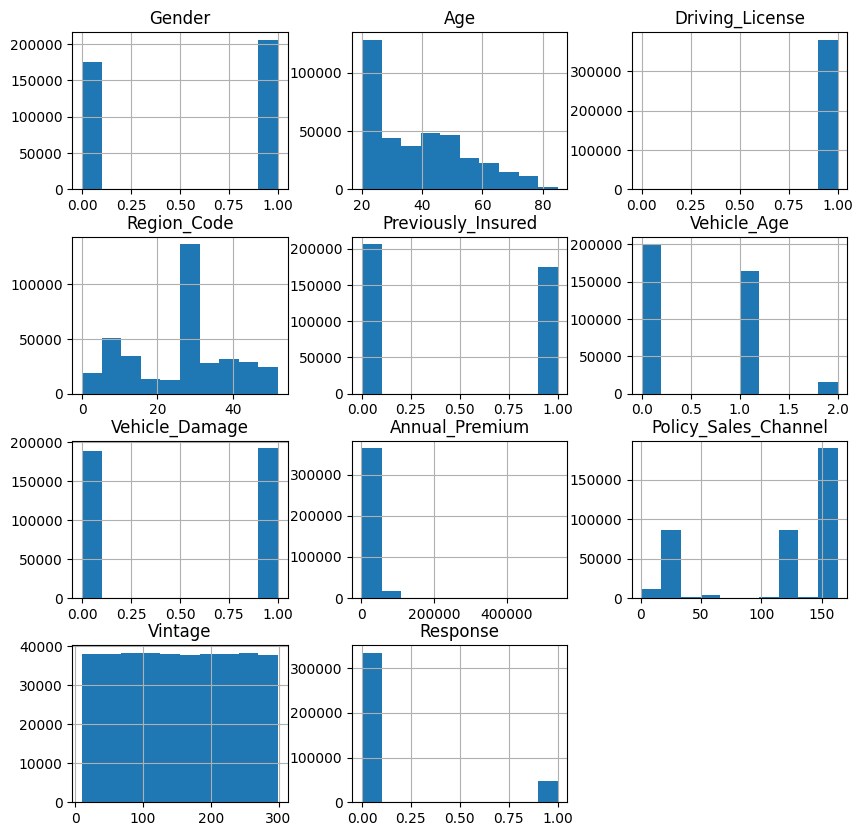

In [9]:
data.hist(figsize=(10, 10))
plt.show()

<Axes: >

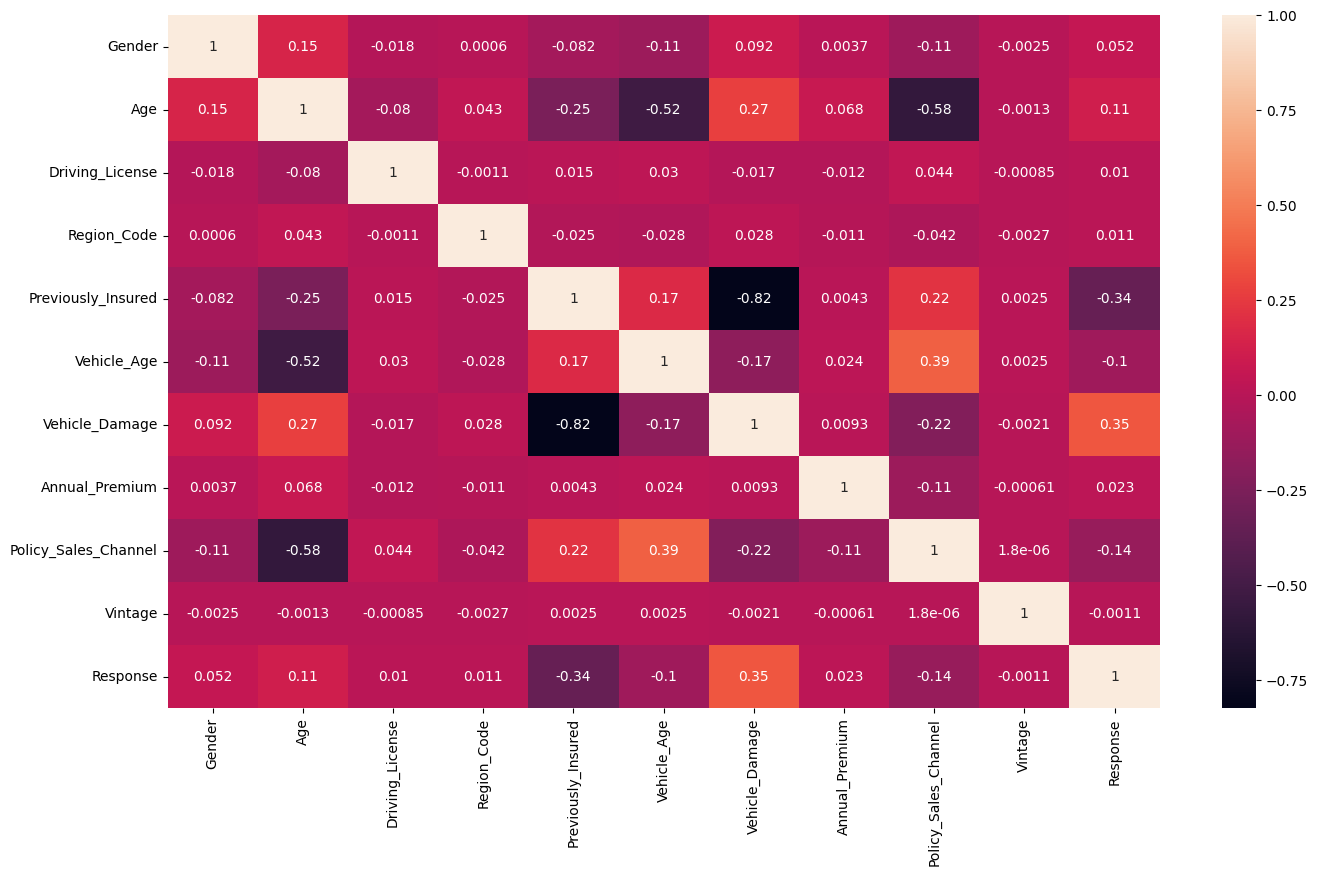

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True)

In [21]:
data = pd.read_csv('./train.csv')

In [22]:
df=data.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

<Axes: xlabel='Response'>

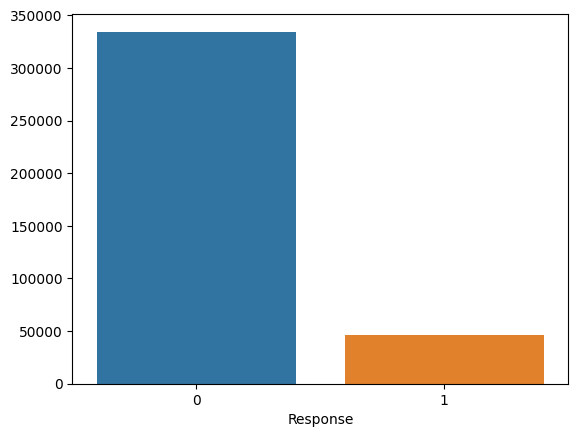

In [23]:
count = data['Response'].value_counts()
sns.barplot(x=count.index, y=count.values)

<Axes: xlabel='Gender'>

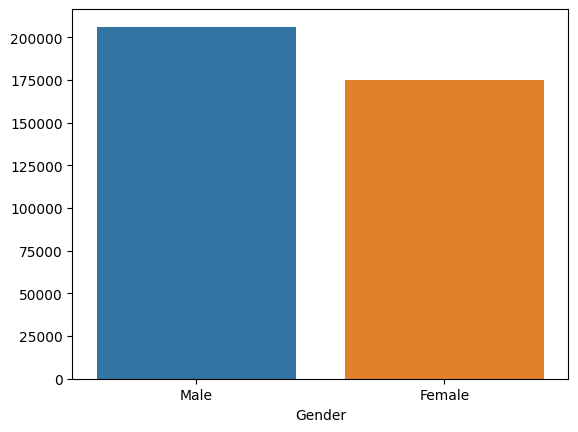

In [24]:
gender_counts = data['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)

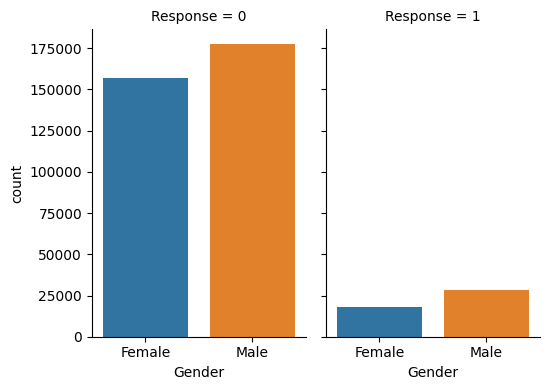

In [25]:
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7)

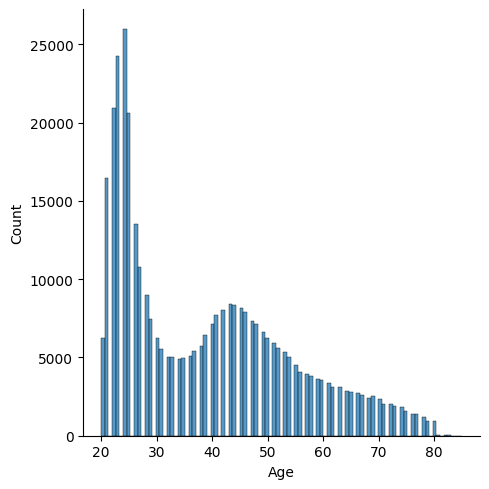

In [26]:
sns.displot(data['Age'])

<Axes: xlabel='Vehicle_Age'>

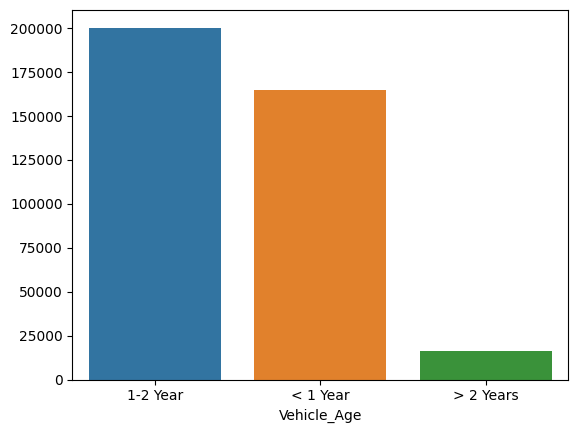

In [27]:
gender_counts = data['Vehicle_Age'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)

In [29]:
df=data.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


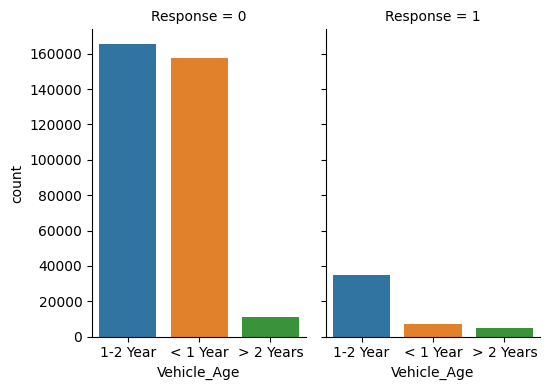

In [31]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7)

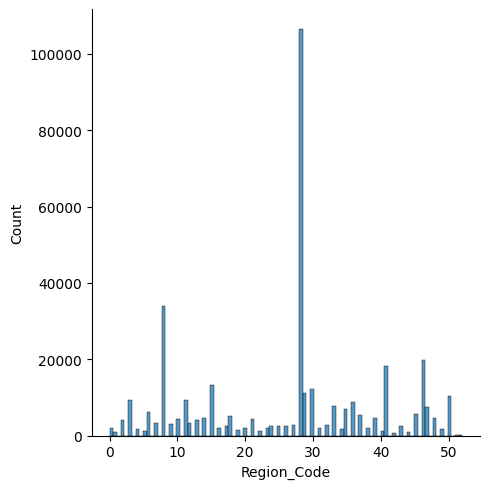

In [32]:
sns.displot(data['Region_Code'])

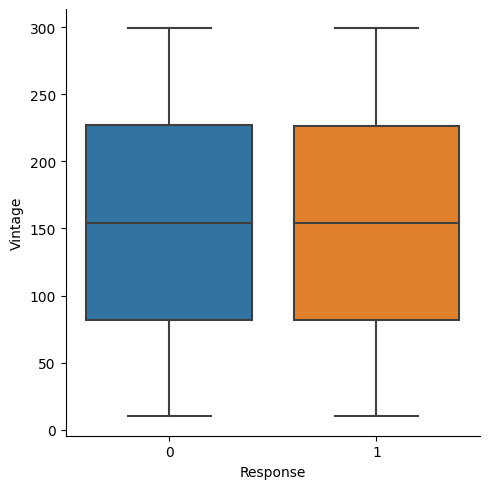

In [34]:
sns.catplot(x="Response", y="Vintage", data=data, kind="box")